# Analyze for Zuber

### progect description
Here is an analysis for Zuber, a new ride-sharing company that's launching in Chicago and wants to find patterns in the available information, understand passenger preferences and the impact of external factors on rides. To do so I will study my databases, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyze-for-Zuber" data-toc-modified-id="Analyze-for-Zuber-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyze for Zuber</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#progect-description" data-toc-modified-id="progect-description-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>progect description</a></span></li></ul></li></ul></li><li><span><a href="#Step-4.-Exploratory-data-analysis" data-toc-modified-id="Step-4.-Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 4. Exploratory data analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Types-Conversion" data-toc-modified-id="Data-Types-Conversion-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Data Types Conversion</a></span></li><li><span><a href="#Conclusion-On-Datasets" data-toc-modified-id="Conclusion-On-Datasets-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Conclusion On Datasets</a></span></li><li><span><a href="#top-10-neighborhoods-in-terms-of-drop-offs" data-toc-modified-id="top-10-neighborhoods-in-terms-of-drop-offs-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>top 10 neighborhoods in terms of drop-offs</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Visualisation</a></span></li><li><span><a href="#taxi-companies-and-number-of-rides" data-toc-modified-id="taxi-companies-and-number-of-rides-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>taxi companies and number of rides</a></span></li><li><span><a href="#Top-10-neighborhoods-by-number-of-dropoffs" data-toc-modified-id="Top-10-neighborhoods-by-number-of-dropoffs-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Top 10 neighborhoods by number of dropoffs</a></span></li><li><span><a href="#Conclusion-On-Studied-Leaders" data-toc-modified-id="Conclusion-On-Studied-Leaders-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>Conclusion On Studied Leaders</a></span></li></ul></li></ul></li><li><span><a href="#Step-5.-Testing-hypotheses" data-toc-modified-id="Step-5.-Testing-hypotheses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 5. Testing hypotheses</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Conclusion-On-Hypothesis" data-toc-modified-id="Conclusion-On-Hypothesis-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Conclusion On Hypothesis</a></span></li></ul></li></ul></li><li><span><a href="#STEP-6.-General-conclusion" data-toc-modified-id="STEP-6.-General-conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>STEP 6. General conclusion</a></span></li></ul></div>

# Step 4. Exploratory data analysis

_We will use 5 <a id='libraries'>libraries</a>:_ 
* pandas: for data processing
* numpy: for calculations like varience, std, etc.
* matplotlib, plotly: for data visualisation
* scipy: for hypothesis exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
try:
    companies = pd.read_csv('https://code.s3.yandex.net//datasets/project_sql_result_01.csv')
    drop_off_location = pd.read_csv('https://code.s3.yandex.net//datasets/project_sql_result_04.csv')
    Loop_O_Hare = pd.read_csv('https://code.s3.yandex.net//datasets/project_sql_result_07.csv')
except FileNotFoundError:
    print('File not found:', file_name)
except Exception:
    print('Another Error:', file_name)

In [3]:
databases = [companies, drop_off_location, Loop_O_Hare]

for database in databases:
    print(database.head())
    print(database.info())
    print(database.describe())
    print()
    print()
    print()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000



  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4  

### Data Types Conversion

In [4]:
Loop_O_Hare.start_ts = Loop_O_Hare.start_ts.apply(lambda x: pd.to_datetime(x))
Loop_O_Hare.weather_conditions = Loop_O_Hare.weather_conditions.astype(
    'category')
Loop_O_Hare.duration_seconds = Loop_O_Hare.duration_seconds.astype('int')

In [5]:
companies.company_name = companies.company_name.astype('string')
drop_off_location.dropoff_location_name = drop_off_location.dropoff_location_name.astype(
    'string')

In [6]:
print(Loop_O_Hare.start_ts.min(), Loop_O_Hare.start_ts.max())

2017-11-04 00:00:00 2017-11-25 23:00:00


In [7]:
Loop_O_Hare.start_ts.max() - Loop_O_Hare.start_ts.min()

Timedelta('21 days 23:00:00')

### Conclusion On Datasets

We have datasets with no missing values, they are concrete and clear, but some data type replacements needed to be made.    
We have 64 companies with total trips amount form 2 to 19558, with positive skewned distribution, mean is more then 10 times bigger than median. We have 94 drop off drop_off_locations with amount of trips to them varing from 1 to 10727. The study period of Loop_O_Hare trips dataset is nearly 24 days. 

### top 10 neighborhoods in terms of drop-offs

In [8]:
top_10 = list(drop_off_location.dropoff_location_name.head(10))
top_10

['Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

### Visualisation

### taxi companies and number of rides

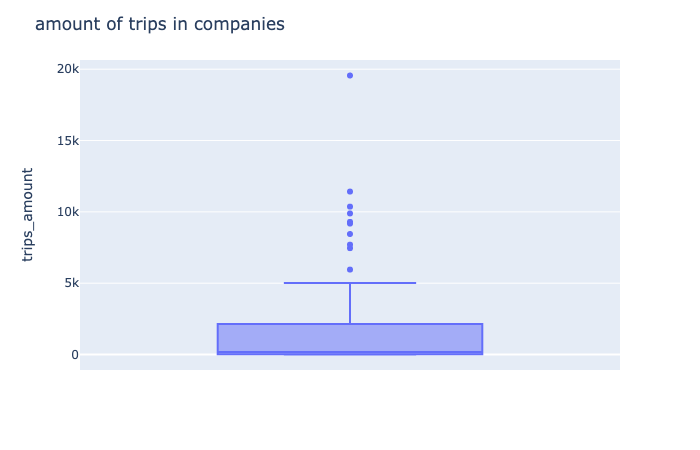

In [9]:
fig = px.box(companies, y="trips_amount")
fig.update_layout(title_text='amount of trips in companies')
fig.show('png')

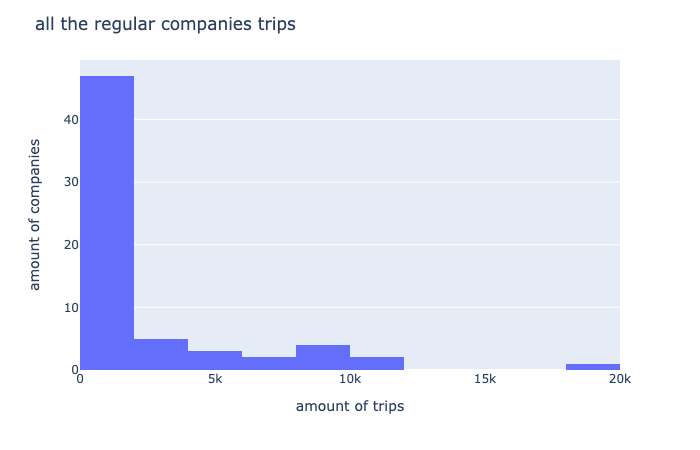

In [10]:
fig = px.histogram(companies, x='trips_amount')

fig.update_layout(title_text='all the regular companies trips',
                  xaxis_title_text='amount of trips',
                  yaxis_title_text='amount of companies')
fig.show('png')

In [11]:
Q3 = companies.trips_amount.quantile(0.75)
Q1 = companies.trips_amount.quantile(0.25)
IQR = Q3-Q1
top_companies = companies[companies['trips_amount']
                          > Q3 + IQR*1.5]['company_name'].tolist()
top_companies

['Flash Cab',
 'Taxi Affiliation Services',
 'Medallion Leasing',
 'Yellow Cab',
 'Taxi Affiliation Service Yellow',
 'Chicago Carriage Cab Corp',
 'City Service',
 'Sun Taxi',
 'Star North Management LLC',
 'Blue Ribbon Taxi Association Inc.']

How many procent it is?

In [12]:
trips_procent = companies[companies['trips_amount'] > Q3 + IQR *
                          1.5].trips_amount.sum() / companies.trips_amount.sum() * 100
trips_procent

72.29719396115387

In [13]:
print(
    f'We can see from the boxplot that most of companies have up to 5015 trips, and the historgrams show us, that the biggest part of those amounts is less then 500. So cleary the outliers companies are the industry leaders: {top_companies}.\n')


We can see from the boxplot that most of companies have up to 5015 trips, and the historgrams show us, that the biggest part of those amounts is less then 500. So cleary the outliers companies are the industry leaders: ['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing', 'Yellow Cab', 'Taxi Affiliation Service Yellow', 'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi', 'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.'].



### Top 10 neighborhoods by number of dropoffs

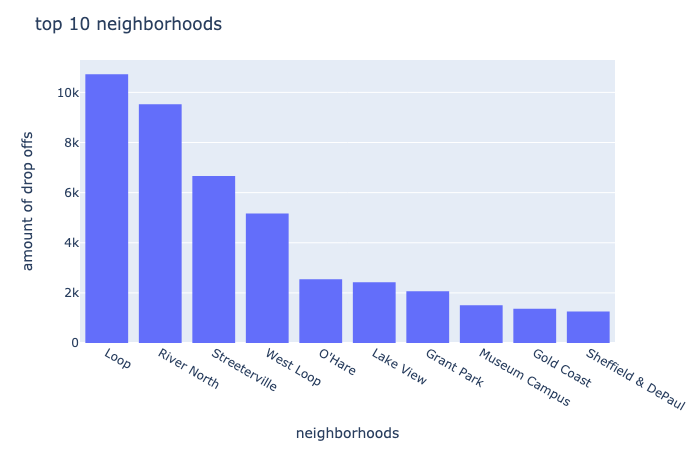

In [14]:
fig = px.histogram(drop_off_location.head(10), x='dropoff_location_name', y='average_trips')

fig.update_layout(title_text='top 10 neighborhoods',
                  xaxis_title_text='neighborhoods',
                  yaxis_title_text='amount of drop offs')
fig.show('png')

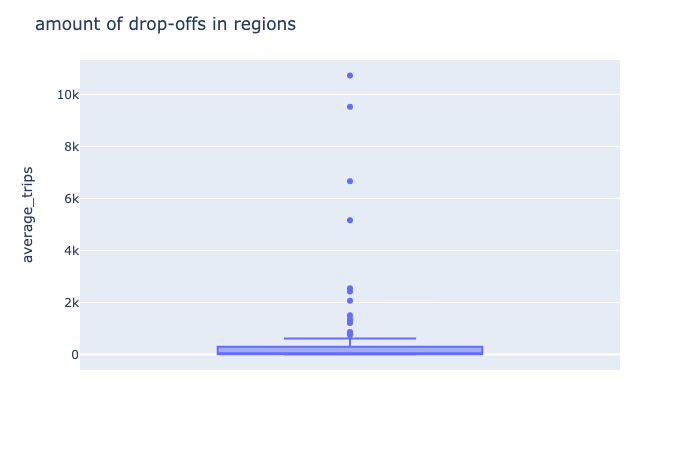

In [15]:
fig = px.box(drop_off_location, y="average_trips")
fig.update_layout(title_text='amount of drop-offs in regions')
fig.show('png')

In [16]:
Q3 = drop_off_location.average_trips.quantile(0.75)
Q1 = drop_off_location.average_trips.quantile(0.25)
IQR = Q3-Q1
outliers_percent = drop_off_location[drop_off_location['average_trips'] > Q3 +
                                     IQR*1.5].average_trips.sum() / drop_off_location.average_trips.sum() * 100
outliers_percent

86.89866377232967

In [17]:
top10_percent = drop_off_location.head(
    10).average_trips.sum() / drop_off_location.average_trips.sum() * 100
top10_percent

76.69007507076712

In [18]:
all_outliers = list(enumerate(
    drop_off_location[drop_off_location['average_trips'] > Q3 + IQR*1.5].dropoff_location_name))
all_outliers

[(0, 'Loop'),
 (1, 'River North'),
 (2, 'Streeterville'),
 (3, 'West Loop'),
 (4, "O'Hare"),
 (5, 'Lake View'),
 (6, 'Grant Park'),
 (7, 'Museum Campus'),
 (8, 'Gold Coast'),
 (9, 'Sheffield & DePaul'),
 (10, 'Lincoln Park'),
 (11, 'East Village'),
 (12, 'Little Italy, UIC'),
 (13, 'Uptown'),
 (14, 'Near South Side'),
 (15, 'Garfield Ridge')]

### Conclusion On Studied Leaders

In [19]:
print(
    f'The second plot shows to us that in general neibourhouds get less then 620 trips, meanwhile the numper of drop-offs for the top ten neibourhouds is more then 20 times higher than that. So those 10 places: {drop_off_location.dropoff_location_name.head(10).tolist()} are the most popular ones. Google proves it by saying"Loop is the heart of Chicago"')

The second plot shows to us that in general neibourhouds get less then 620 trips, meanwhile the numper of drop-offs for the top ten neibourhouds is more then 20 times higher than that. So those 10 places: ['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare", 'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast', 'Sheffield & DePaul'] are the most popular ones. Google proves it by saying"Loop is the heart of Chicago"


# Step 5. Testing hypotheses


We need to test the <a id='hypothesis_1'>hypothesis</a>:
_"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."_ <br>
__Null hypotheses__: average duration of rides from the Loop to O'Hare International Airport is similar in rainy and not-rainy days"   
__Alternative hypotheses__: it differs

In [20]:
rainy_days = Loop_O_Hare[Loop_O_Hare.weather_conditions ==
                         'Bad']['duration_seconds']
sunny_days = Loop_O_Hare[Loop_O_Hare.weather_conditions ==
                         'Good']['duration_seconds']

We need to establish whether the variance of rainy and sunny days can be considered equal. to do so, let's use Levene’s Test in Python


In [21]:
st.levene(sunny_days, rainy_days, center='median')

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

Since the p-value is not less than .05, we fail to reject the null hypothesis: meaning they variance is equal

In [22]:
alpha = 0.05

results = st.ttest_ind(sunny_days, rainy_days, equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis,\n the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays")
else:
    print("We can't reject the null hypothesis,\nthe average duration of rides from the Loop to O'Hare International Airport remains the same on rainy Saturdays")

p-value:  6.517970327099473e-12
We reject the null hypothesis,
 the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays


In [23]:
print(rainy_days.mean(), sunny_days.mean())

2427.2055555555557 1999.6756756756756


### Conclusion On Hypothesis

The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays and it sure get's longer because of problems storm weather causes to traffic.


# STEP 6. General conclusion
<a id='general_conclusion'> </a>

In [24]:
print(f"We have studied 64 taxi companies and found 10 top companies making the most profit and {round(trips_procent,0)}% of all trips: {top_companies}.\n\n Moreover, we found 10 neibourhoud making {round(top10_percent,0)} of drop-offs of 94 neibourhouds. And even though the top 10 are \n{drop_off_location.head(10).dropoff_location_name.tolist()}\n we have 15 outliers neibourhoods holding {round(outliers_percent,0)} of all dropdowns:\n {all_outliers}. \n\n We've also studied duration of rides from the Loop to O'Hare International Airport for nearly 24 days and come to a certain conclusion that the average duration of rides gets longer because of problems storm weather causes to traffic.")

We have studied 64 taxi companies and found 10 top companies making the most profit and 72.0% of all trips: ['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing', 'Yellow Cab', 'Taxi Affiliation Service Yellow', 'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi', 'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.'].

 Moreover, we found 10 neibourhoud making 77.0 of drop-offs of 94 neibourhouds. And even though the top 10 are 
['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare", 'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast', 'Sheffield & DePaul']
 we have 15 outliers neibourhoods holding 87.0 of all dropdowns:
 [(0, 'Loop'), (1, 'River North'), (2, 'Streeterville'), (3, 'West Loop'), (4, "O'Hare"), (5, 'Lake View'), (6, 'Grant Park'), (7, 'Museum Campus'), (8, 'Gold Coast'), (9, 'Sheffield & DePaul'), (10, 'Lincoln Park'), (11, 'East Village'), (12, 'Little Italy, UIC'), (13, 'Uptown'), (14, 'Near South Side'), (15, 'Garfield Ridge')]. 
